In [24]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import math

In [22]:
# Define the input message u(D)=1+ D^2
#u = np.poly1d([1, 0, 1])
# Define the generator polynomials for the convolutional code
# Define a vector of polynomial coefficients
coefficients = np.array([[1, 0, 1], [1, 1, 1], [1, 1, 0]])
# Define a vector of polynomial functions
G= [np.poly1d(coefficients[0,:]), np.poly1d(coefficients[1,:]), np.poly1d(coefficients[2,:])]
#encode the input message
def encode(u):
    x=np.zeros((3,5))
    for i in range(3):
        s=G[i]*u
        c=s.coefficients %2
        if len(c)!=5:
            a=np.zeros((5-len(c)))
            c=np.concatenate([a,c])
        
        x[i,:]= c
    
    return(np.concatenate([x[2,:],x[1,:],x[0,:]]))
vectors = list(itertools.product([0, 1], repeat=3))
vectors=vectors[1:]
codebook=[]
d={}
for i in range(7):
    u = np.poly1d(vectors[i])
    print(u)
    codebook.append(encode(u))
    e=encode(u)
    lst = e.tolist()
    d[str(lst)]=vectors[i]
random.shuffle(codebook)
print(codebook)
print(d)


 
1
 
1 x
 
1 x + 1
   2
1 x
   2
1 x + 1
   2
1 x + 1 x
   2
1 x + 1 x + 1
[array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.]), array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.]), array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]), array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.]), array([0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.]), array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.])]
{'[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]': (0, 0, 1), '[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]': (0, 1, 0), '[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]': (0, 1, 1), '[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]': (1, 0, 0), '[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]': 

In [23]:


def noisy_channel(encoded_message, crossover_prob):
    """
    Simulates transmission of an encoded message through a memoryless noisy channel based on a given crossover probability.
    
    Parameters:
        encoded_message (array): The encoded message to transmit.
        crossover_prob (float): The probability that a bit will be flipped during transmission.
    
    Returns:
        str: The received message after transmission through the noisy channel.
    """
    y = []
    for bit in encoded_message:
        if random.random() < crossover_prob:
            # flip the bit
            if bit == 1 :
                y=np.append(y,0)  
            else :
                y=np.append(y,1)
        else:
            # leave the bit unchanged
            y=np.append(y, int(bit)) 
    return y
received_message=np.zeros((1,15))
crossover_prob = 0.3
encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3] ])
received_message = noisy_channel(encoded_message, crossover_prob)
s=np.sum(encoded_message!=received_message)/len(received_message)
print(s)
print('Encoded message:', encoded_message)
print('Received message:', received_message)


0.31666666666666665
Encoded message: [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
Received message: [0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]


Ziv Universal Decoding Function

In [25]:
def decouper_sequence_binaire(y,x):
    
    i= 1
    w=[(x[0],y[0])]
    while i <=len(y)-1:
        ybit = str(y[i])
        xbit = str(x[i])
        
        while (xbit,ybit) in w:
            if i ==len(y)-1:
                w.append((xbit,ybit))
                return(w) 
            else:
                i=i+1
                xbit = xbit + str(x[i])
                ybit = ybit + str(y[i])
        w.append((xbit,ybit)) 
        i += 1
    return w


def univ_dec( Y, X):
    W = decouper_sequence_binaire(Y, X)
    Cxy={}
    j=0
    w=set(W)
    n=len(X)
    l_xy={}
    for i in w:
        if i[1] in Cxy.keys():
            Cxy[i[1]]+=1
        else:
            Cxy[i[1]]=1
        l_xy[i[1]]=np.log2(Cxy[i[1]])
    s = (1 / n) * sum(i * j for i, j in zip(list(Cxy.values()), list(l_xy.values())))
    return(s)
u=[]
y=[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
for x in codebook:
    u.append(univ_dec(y,x))
min_index = u.index(min(u))
print(codebook[min_index], univ_dec(y,codebook[min_index]))

[0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.] 0.26666666666666666


MMI Decoder

In [26]:


def mmi_decoder(codebook,received_message):
    
    # Calcul de Py
    n0_recu=0
    n1_recu=0
    for bit in received_message:
        if bit==0:
            n0_recu=n0_recu+1
        else:
            n1_recu=n1_recu+1
    Py = (n0_recu/(n0_recu+n1_recu), n1_recu/(n0_recu+n1_recu))
    
    # Calcul de toutes les Px pour chaque codeword
    Px_list = []
    for codeword in codebook:
        n0_codeword=0
        n1_codeword=0
        for bit in codeword:
            if (bit==0):
                n0_codeword=n0_codeword+1
            else:
                n1_codeword=n1_codeword+1
        
        Px_codeword = (n0_codeword/len(codeword), n1_codeword/len(codeword))
        Px_list.append(Px_codeword)
    # Stocker tous les Pxy pour chaque codeword dans une liste
    Pxy_list = []
    for codeword in codebook:
        n00 = n01 = n10 = n11 = 0
        for i in range(len(received_message)):
            if str(int(codeword[i]) )== '0' and  str(int(received_message[i] ))== '0':
                n00 += 1
            elif  str(int(codeword[i])) == '0' and  str(int(received_message[i] ))== '1':
                n01 += 1
            elif  str(int(codeword[i])) == '1' and  str(int(received_message[i])) == '0':
                n10 += 1
            else:
                n11 += 1
        d = n00 + n11 + n10 + n01
        Pxy_codeword = (n00/d, n01/d, n10/d, n11/d)
        Pxy_list.append(Pxy_codeword)
    
    # Calcul de l'information mutuelle pour chaque codeword
    j=0
    mutual_all=[]
    for codeword in codebook:
        mutuel_info=0
        
        for i in range(len(received_message)):
            if str(int(codeword[i])) == '0' and str(int(received_message[i] ))== '0':
                    mutuel_info+=Pxy_list[j][0]*math.log2(Pxy_list[j][0]/(Px_list[j][0]*Py[0]))
            elif str(int(codeword[i])) == '0' and str(int(received_message[i])) == '1':
                    mutuel_info+=Pxy_list[j][1]*math.log2(Pxy_list[j][1]/(Px_list[j][0]*Py[1]))
            elif str(int(codeword[i] ))== '1' and str(int(received_message[i] ))== '0':
                    mutuel_info+=Pxy_list[j][2]*math.log2(Pxy_list[j][2]/(Px_list[j][1]*Py[0]))
            else:
                    mutuel_info+=Pxy_list[j][3]*math.log2(Pxy_list[j][3]/(Px_list[j][1]*Py[1]))
        j=j+1
        mutual_all.append( mutuel_info)
    max_minformation = max(mutual_all) 
    x_hat = codebook[mutual_all.index(max_minformation )]
    
    # Retourner le message ayant l'information mutuelle maximale
    return x_hat
    #mutual_info=Pxy_list[j][0]*15*Pxy_list[j][0]*math.log2(Pxy_list[j][0]/(Px_list[j][0]*Py[0]))+Pxy_list[j][1]*15*Pxy_list[j][1]*math.log2(Pxy_list[j][1]/(Px_list[j][0]*Py[1]))+Pxy_list[j][2]*15*Pxy_list[j][2]*math.log2(Pxy_list[j][2]/(Px_list[j][1]*Py[0]))+Pxy_list[j][3]*15*Pxy_list[j][3]*math.log2(Pxy_list[j][3]/(Px_list[j][1]*Py[1]))


ML Decoder

In [27]:
def max_likelihood_decoder(received_message, codebook, cross_over):
    p_c = cross_over
    x_hat = []
    hamming_distances = []

    for x_i in codebook:
        distance = 0
        for i in range(len(x_i)):
            if x_i[i] != received_message[i]:
                distance += 1
        hamming_distances.append(distance)

    if p_c < 0.5:
        decoded_index = hamming_distances.index(min(hamming_distances))
    else:
        decoded_index = hamming_distances.index(max(hamming_distances))

    

    return codebook[decoded_index]

print(max_likelihood_decoder(received_message, codebook,crossover_prob))


[0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


Simulation

1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
[0.0, 0.156, 0.322, 0.43466666666666665, 0.5026666666666667, 0.5026666666666667, 0.478, 0.452, 0.332, 0.13733333333333334, 0.0]
[0.0, 0.02266666666666667, 0.112, 0.284, 0.4513333333333333, 0.5186666666666667, 0.458, 0.30666666666666664, 0.11733333333333333, 0.018, 0.0]
[0.0, 0.006, 0.05533333333333333, 0.18333333333333332, 0.37066666666666664, 0.5226666666666666, 0.36, 0.184, 0.06733333333333333, 0.0033333333333333335, 0.0]


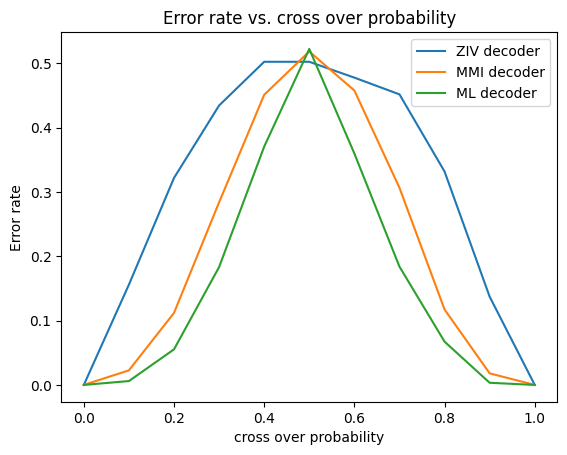

In [35]:
t=np.random.randint(0, 6, 500)
v=[]
encoded_message=[]
for i in t:
    v=np.concatenate([ vectors[i], v])
    u = np.poly1d(vectors[i])
    encoded_message =np.concatenate([ encode(u), encoded_message])

#encoded_message =codebook[1]
#encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5] ])
#cross_over = sorted([random.uniform(0, 1) for _ in range(50)])
cross_over= [i * 0.1 for i in range(0, 11)]
n=len(encoded_message)
P_err_ziv=[]
P_err_MMI=[]
P_err_ML=[]

for i in cross_over:
    received_message = noisy_channel(encoded_message, i)
    
    y_ziv=[]
    y_mmi=[]
    y_ml=[]
    for j in range(len(received_message)//15):
        #ZIV
        u=[]
        for x in codebook:
            u.append(univ_dec(received_message[j*15:(j+1)*15],x))
        min_index = u.index(min(u))
        y_ziv=np.concatenate([y_ziv, d[str(codebook[min_index].tolist())]])
        #MMI
        y_mmi= np.concatenate([y_mmi, d[str(mmi_decoder(codebook,received_message[j*15:(j+1)*15]).tolist())]])
        #ML
        y_ml= np.concatenate([y_ml,  d[str(max_likelihood_decoder(received_message[j*15:(j+1)*15], codebook, i).tolist())]])
    print(len(v))
    P_err_ziv.append(np.sum(v!=y_ziv)/len(y_ziv))
    P_err_MMI.append(np.sum(v!=y_mmi)/len(y_mmi))
    P_err_ML.append(np.sum(v!=y_ml)/len(y_ml))

print(P_err_ziv)
print(P_err_MMI)
print(P_err_ML)
# plot the graph
plt.plot(cross_over, P_err_ziv,label='ZIV decoder')
plt.plot(cross_over, P_err_MMI,label='MMI decoder')
plt.plot(cross_over, P_err_ML,label='ML decoder')
# add labels and title
plt.xlabel('cross over probability')
plt.ylabel('Error rate')
plt.title('Error rate vs. cross over probability')
plt.legend()
# display the graph
plt.show()
  
